# ADQUISITION

## llamado a base de datos relacionales con sqlite

In [39]:
# libreria para manejo de datos

import pandas as pd
import numpy as np

In [40]:
import sqlite3

conn = sqlite3.connect('/content/drive/MyDrive/proyectos_diseños/analisis_datos/a_poker/poker_database.db')
cursor = conn.cursor()

cursor.execute('''
    SELECT * FROM hands_database
    ''')

results = cursor.fetchall()
poker_df = pd.DataFrame(results)

cursor.close()
conn.close()

poker_df.shape

(4448, 62)

# TRANSFORMACION

In [41]:
# renombrar las variables

nuevos_nombres = {
    0: 'id_mano', 1: 'tipo_juego', 2: 'id_torneo', 3: 'entrada', 4: 'nivel_torneo', 5: 'ciegas',
    6: 'fecha_hora', 7: 'id_mesa', 8: 'max_jugadores', 9: 'asiento_boton', 10: 'asiento_jugador',
    11: 'fichas_jugador', 12: 'ausente', 13: 'pone_ante', 14: 'pone_cp', 15: 'pone_cg',
    16: 'esta_allin', 17: 'retiro', 18: 'cartas_jugador', 19: 'pf_igualo', 20: 'pf_igualo_cuanto',
    21: 'pf_subio', 22: 'pf_subio_cuanto', 23: 'pf_apuesta', 24: 'pf_apuesta_cuanto', 25: 'pf_pasa',
    26: 'pf_ausente', 27: 'pf_allin', 28: 'fl_igualo', 29: 'fl_igualo_cuanto', 30: 'fl_subio',
    31: 'fl_subio_cuanto', 32: 'fl_apuesta', 33: 'fl_apuesta_cuanto', 34: 'fl_pasa', 35: 'fl_ausente',
    36: 'fl_allin', 37: 'tn_igualo', 38: 'tn_igualo_cuanto', 39: 'tn_subio', 40: 'tn_subio_cuanto',
    41: 'tn_apuesta', 42: 'tn_apuesta_cuanto', 43: 'tn_pasa', 44: 'tn_ausente', 45: 'tn_allin',
    46: 'rv_igualo', 47: 'rv_igualo_cuanto', 48: 'rv_subio', 49: 'rv_subio_cuanto', 50: 'rv_apuesta',
    51: 'rv_apuesta_cuanto', 52: 'rv_pasa', 53: 'rv_ausente', 54: 'rv_allin', 55: 'finalizo',
    56: 'posicion', 57: 'bote_total', 58: 'comision', 59: 'comunitarias', 60: 'gano',
    61: 'bote_ganado'
}

poker_df = poker_df.rename(columns=nuevos_nombres)
poker_df.head()

,id_mano,tipo_juego,id_torneo,entrada,nivel_torneo,ciegas,fecha_hora,id_mesa,max_jugadores,asiento_boton,...,rv_pasa,rv_ausente,rv_allin,finalizo,posicion,bote_total,comision,comunitarias,gano,bote_ganado
0,243453280940,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:28:05 ET,3580547970 84,9-max,6,...,False,False,False,False,None,3532,0,Qh 4h Qs Td 9s,no gano,None
1,243453293149,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:28:36 ET,3580547970 84,9-max,7,...,no jugado,no jugado,no jugado,False,None,500,0,None,no gano,None
2,243453300468,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:28:55 ET,3580547970 84,9-max,8,...,False,False,False,False,None,9810,0,5s 6h Qd 2d 5d,no gano,None
3,243453315040,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:29:32 ET,3580547970 84,9-max,9,...,no jugado,no jugado,no jugado,False,None,1000,0,5c As Ah,no gano,None
4,243453330160,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:30:11 ET,3580547970 84,9-max,1,...,False,False,False,False,None,3200,0,Tc 2d 8d 3h 8h,no gano,None


In [42]:
poker_df.shape

(4448, 62)

In [43]:
# explorar variables

poker_df['retiro'].value_counts()

preflop    3299
None        759
flop        248
turn         83
river        59
Name: retiro, dtype: int64

In [44]:
# voy a cambiar los valores 'None' por 'no_ver_flop' de la columna 'retiro'

poker_df['retiro'] = poker_df['retiro'].replace('None', 'no_ver_flop')

## variable target

In [45]:
# creo la variable target con 3 estados posibles

def asignar_valor(row):
    if row['retiro'] == 'preflop':
        return 'abortar'
    elif row['retiro'] in ['flop', 'turn', 'river', 'no_ver_flop'] and row['gano'] == 'no gano':
        return 'posibilidad_perder'
    elif row['retiro'] == 'no_ver_flop' and row['gano'] != 'no gano':
        return 'posibilidad_ganar'
    else:
        return None

poker_df['target_posible_resultado'] = poker_df.apply(asignar_valor, axis=1)

poker_df.head()

,id_mano,tipo_juego,id_torneo,entrada,nivel_torneo,ciegas,fecha_hora,id_mesa,max_jugadores,asiento_boton,...,rv_ausente,rv_allin,finalizo,posicion,bote_total,comision,comunitarias,gano,bote_ganado,target_posible_resultado
0,243453280940,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:28:05 ET,3580547970 84,9-max,6,...,False,False,False,None,3532,0,Qh 4h Qs Td 9s,no gano,None,abortar
1,243453293149,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:28:36 ET,3580547970 84,9-max,7,...,no jugado,no jugado,False,None,500,0,None,no gano,None,abortar
2,243453300468,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:28:55 ET,3580547970 84,9-max,8,...,False,False,False,None,9810,0,5s 6h Qd 2d 5d,no gano,None,abortar
3,243453315040,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:29:32 ET,3580547970 84,9-max,9,...,no jugado,no jugado,False,None,1000,0,5c As Ah,no gano,None,abortar
4,243453330160,torneo,3580547970,freeroll,VI,100/200,02-05-2023 16:30:11 ET,3580547970 84,9-max,1,...,False,False,False,None,3200,0,Tc 2d 8d 3h 8h,no gano,None,abortar


## variables features

### filtrado y limpieza

In [46]:
# filtrar los valores 'torneo' dentro de la variable 'tipo_juego'
poker_df = poker_df.loc[poker_df['tipo_juego'] == 'torneo']

# convertir la columna 'entrada' a binaria
poker_df['entrada'] = poker_df['entrada'].map(lambda x: 'micro_entrada' if x != 'freeroll' else x)

# valores de ciegas de str a float
poker_df['ciega_grande'] = poker_df['ciegas'].str.split('/').str[1].astype(float)

# voy a eliminar todos los registros que tengan un valor tipo string (o nulos) dentro de la columna 'fichas_jugador'
poker_df = poker_df[poker_df['fichas_jugador'] != 'None']


<ipython-input-46-9c4c4b8027e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poker_df['entrada'] = poker_df['entrada'].map(lambda x: 'micro_entrada' if x != 'freeroll' else x)


In [47]:
poker_df.shape

(3888, 64)

### dataframe final

Aca tuve un caso de VALORES NULOS en la variables 'fichas_jugador' debido a un error de la funcion de recoleccion en registros de un torneo especifico.

In [48]:
df_variables_filtradas = poker_df[['target_posible_resultado','entrada', 'nivel_torneo', 'ciega_grande', 'max_jugadores', 'asiento_boton', 'asiento_jugador', 'fichas_jugador', 'pone_cp', 'pone_cg', 'ausente']]
df_variables_filtradas.head()

,target_posible_resultado,entrada,nivel_torneo,ciega_grande,max_jugadores,asiento_boton,asiento_jugador,fichas_jugador,pone_cp,pone_cg,ausente
0,abortar,freeroll,VI,200.0,9-max,6,8,3227.0,False,True,False
1,abortar,freeroll,VI,200.0,9-max,7,8,3027.0,True,False,False
2,abortar,freeroll,VI,200.0,9-max,8,8,2927.0,False,False,False
3,abortar,freeroll,VI,200.0,9-max,9,8,2927.0,False,False,False
4,abortar,freeroll,VI,200.0,9-max,1,8,2927.0,False,False,False


# ANALISIS E INGENIERIA DE FEATURES

## codificacion

In [49]:
# transformo las columnas categoricas para representarlas en numeros, y poder entrenar el algoritmo

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le, oe = LabelEncoder(), OrdinalEncoder()

In [50]:
df_variables_filtradas['target_posible_resultado'] = le.fit_transform(df_variables_filtradas['target_posible_resultado'])
mapeo = dict(zip(le.classes_, range(len(le.classes_))))
for categoria, numero in mapeo.items():
    print(f'{categoria} -> {numero}')

abortar -> 0
posibilidad_ganar -> 1
posibilidad_perder -> 2


<ipython-input-50-6df997727227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables_filtradas['target_posible_resultado'] = le.fit_transform(df_variables_filtradas['target_posible_resultado'])


In [51]:
df_variables_filtradas['entrada'] = le.fit_transform(df_variables_filtradas['entrada'])
mapeo = dict(zip(le.classes_, range(len(le.classes_))))
for categoria, numero in mapeo.items():
    print(f'{categoria} -> {numero}')

freeroll -> 0
micro_entrada -> 1


<ipython-input-51-b124965de27d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables_filtradas['entrada'] = le.fit_transform(df_variables_filtradas['entrada'])


In [52]:
df_variables_filtradas['nivel_torneo'] = le.fit_transform(df_variables_filtradas['nivel_torneo'])
mapeo = dict(zip(le.classes_, range(len(le.classes_))))
for categoria, numero in mapeo.items():
    print(f'{categoria} -> {numero}')

I -> 0
II -> 1
III -> 2
IV -> 3
IX -> 4
V -> 5
VI -> 6
VII -> 7
VIII -> 8
X -> 9
XI -> 10
XII -> 11
XIII -> 12
XIV -> 13
XIX -> 14
XV -> 15
XVI -> 16
XVII -> 17
XVIII -> 18
XX -> 19
XXI -> 20
XXII -> 21
XXIII -> 22
XXIV -> 23
XXV -> 24
XXVI -> 25
XXVII -> 26


<ipython-input-52-fd475ec4abc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables_filtradas['nivel_torneo'] = le.fit_transform(df_variables_filtradas['nivel_torneo'])


In [53]:
df_variables_filtradas['max_jugadores'] = le.fit_transform(df_variables_filtradas['max_jugadores'])
mapeo = dict(zip(le.classes_, range(len(le.classes_))))
for categoria, numero in mapeo.items():
    print(f'{categoria} -> {numero}')

3-max -> 0
4-max -> 1
6-max -> 2
8-max -> 3
9-max -> 4


<ipython-input-53-b07613c8ee7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables_filtradas['max_jugadores'] = le.fit_transform(df_variables_filtradas['max_jugadores'])


In [54]:
df_variables_filtradas['pone_cp'] = le.fit_transform(df_variables_filtradas['pone_cp'])
mapeo = dict(zip(le.classes_, range(len(le.classes_))))
for categoria, numero in mapeo.items():
    print(f'{categoria} -> {numero}')

False -> 0
True -> 1


<ipython-input-54-cf3aae28f5a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables_filtradas['pone_cp'] = le.fit_transform(df_variables_filtradas['pone_cp'])


In [55]:
df_variables_filtradas['pone_cg'] = le.fit_transform(df_variables_filtradas['pone_cg'])
mapeo = dict(zip(le.classes_, range(len(le.classes_))))
for categoria, numero in mapeo.items():
    print(f'{categoria} -> {numero}')

False -> 0
True -> 1


<ipython-input-55-4899d18ca89c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables_filtradas['pone_cg'] = le.fit_transform(df_variables_filtradas['pone_cg'])


In [56]:
df_variables_filtradas['ausente'] = le.fit_transform(df_variables_filtradas['ausente'])
mapeo = dict(zip(le.classes_, range(len(le.classes_))))
for categoria, numero in mapeo.items():
    print(f'{categoria} -> {numero}')

False -> 0
True -> 1


<ipython-input-56-8cee4b4b5529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables_filtradas['ausente'] = le.fit_transform(df_variables_filtradas['ausente'])


In [57]:
# dataset codificado

df_variables_filtradas.head()

,target_posible_resultado,entrada,nivel_torneo,ciega_grande,max_jugadores,asiento_boton,asiento_jugador,fichas_jugador,pone_cp,pone_cg,ausente
0,0,0,6,200.0,4,6,8,3227.0,0,1,0
1,0,0,6,200.0,4,7,8,3027.0,1,0,0
2,0,0,6,200.0,4,8,8,2927.0,0,0,0
3,0,0,6,200.0,4,9,8,2927.0,0,0,0
4,0,0,6,200.0,4,1,8,2927.0,0,0,0


## entrenamiento y test

In [58]:
# separo mi dataset en entrenamiento y test

from sklearn.model_selection import train_test_split

x = df_variables_filtradas.drop('target_posible_resultado', axis=1)
y = df_variables_filtradas['target_posible_resultado']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)
x_train

,entrada,nivel_torneo,ciega_grande,max_jugadores,asiento_boton,asiento_jugador,fichas_jugador,pone_cp,pone_cg,ausente
1252,0,7,400.0,4,1,1,12147.0,0,0,0
1209,0,2,150.0,4,9,1,11551.0,1,0,0
2417,0,7,500.0,3,7,3,4514.0,0,0,0
3490,0,5,250.0,4,3,3,18518.0,0,0,1
3881,0,18,1600.0,3,4,6,37523.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2345,0,3,200.0,3,3,1,960.0,0,0,0
2573,0,3,100.0,3,6,6,1976.0,0,0,0
2197,0,6,400.0,3,3,3,9616.0,0,0,0
1482,0,4,800.0,4,5,1,1350.0,0,0,1


## estandarizacion

In [59]:
# llevo todos los valores del dataset a la misma escala para que el algoritmo los inteprete mejor

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(x_train)
x_test_scaled = min_max_scaler.transform(x_test)
x_train_scaled.shape, x_test_scaled.shape

((2721, 10), (1167, 10))

# MODELOS

## KNN

### prueba 1 modelo original

In [60]:
# entrenamiento del modelo

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, leaf_size=1, p=1)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)

In [61]:
# metricas del modelo

from sklearn.metrics import classification_report

print("Metricas KNN:\n", classification_report(y_test, y_pred_knn))

Metricas KNN:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84       833
           1       0.67      0.05      0.10       112
           2       0.49      0.20      0.29       222

    accuracy                           0.73      1167
   macro avg       0.64      0.41      0.41      1167
weighted avg       0.69      0.73      0.67      1167



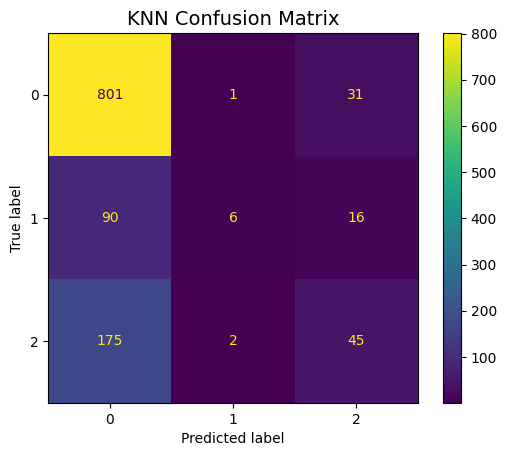

In [62]:
# matriz de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly.express as px, matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("KNN Confusion Matrix", fontsize=14)
plt.show()

### prueba 2 con validacion cruzada / estratificada

In [63]:
# validacion cruzada

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

cross_v = cross_validate(knn, x_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
train_accuracy = cross_v['train_score']
test_accuracy = cross_v['test_score']

# calcular la media de los valores
mean_train_accuracy = np.mean(train_accuracy)
mean_test_accuracy = np.mean(test_accuracy)

print("media cross validation Train Accuracy:", mean_train_accuracy)
print("media cross validation Test Accuracy:", mean_test_accuracy)

media cross validation Train Accuracy: 0.7539508548596288
media cross validation Test Accuracy: 0.7203271721532649


In [64]:
# validacion cruzada / estratificada (para registros desbalanceados)

from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(knn, x_train, y_train, cv=stratified_kfold, scoring='accuracy',
                        return_train_score=True)

print('Cross-Validation in train set :', np.mean(scores['train_score']))
print('Cross-Validation in Validation set:', np.mean(scores['test_score']))

Cross-Validation in train set : 0.7526643434705071
Cross-Validation in Validation set: 0.7291439557474366


### prueba 3 busqueda de los mejores hiperparametros

In [65]:
# grid search

from sklearn.model_selection import GridSearchCV

parametros_knn = {
    'n_neighbors': [7, 9, 11, 13],
    'leaf_size': [2,3,4],
    'p': [1, 2]
    }

gs_knn = GridSearchCV(knn, parametros_knn, cv=stratified_kfold, return_train_score= True, scoring='accuracy')
gs_knn.fit(x_train, y_train)

print("Best Accuracy:", gs_knn.best_score_)

Best Accuracy: 0.742008904479223


In [66]:
gs_knn.best_estimator_

KNeighborsClassifier(leaf_size=2, n_neighbors=13, p=1)

In [67]:
# mejores hiperparametros

results = pd.DataFrame(gs_knn.cv_results_)

results[['params', 'mean_test_score', 'mean_train_score']].head(20)

,params,mean_test_score,mean_train_score
0,"{'leaf_size': 2, 'n_neighbors': 7, 'p': 1}",0.728409,0.752848
1,"{'leaf_size': 2, 'n_neighbors': 7, 'p': 2}",0.723631,0.752573
2,"{'leaf_size': 2, 'n_neighbors': 9, 'p': 1}",0.733556,0.748346
3,"{'leaf_size': 2, 'n_neighbors': 9, 'p': 2}",0.735393,0.750092
4,"{'leaf_size': 2, 'n_neighbors': 11, 'p': 1}",0.740172,0.747152
5,"{'leaf_size': 2, 'n_neighbors': 11, 'p': 2}",0.740173,0.747519
6,"{'leaf_size': 2, 'n_neighbors': 13, 'p': 1}",0.742009,0.746693
7,"{'leaf_size': 2, 'n_neighbors': 13, 'p': 2}",0.741274,0.747887
8,"{'leaf_size': 3, 'n_neighbors': 7, 'p': 1}",0.728776,0.753216
9,"{'leaf_size': 3, 'n_neighbors': 7, 'p': 2}",0.724365,0.752665


EN ESTE CASO GRID SEARCH LOS ESTIMADORES QUE ME DA, AL INTENTAR MEJORAR EL ACCURACY NO TOMA EN CUENTA QUE LE QUITA PODER DE PREDICCION A LOS VALORES CON MENOS REGISTROS, Y CREA UN SESGO QUE HACE QUE EL ALGORITMO NO SEPA PREDECIR EL VALOR 1, POR LO QUE DECIDI PROBAR DISTINTOS PARAMETROS QUE SI BIEN NO MEJORAN EL ACCURACY LE DAN PODER DE PREDICCION A LOS VALORES CON MENOS REGISTROS

### prueba 4 con bagging (entrena algoritmos en paralelo con muestras aleatorias)

In [68]:
# bagging

from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(estimator=knn, n_estimators=80, random_state=42)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

print(f"Bagging accuracy: {accuracy_score(y_test, y_pred_bagging)}")

scores = cross_validate(bagging, x_train, y_train, cv=stratified_kfold, scoring='accuracy',
                        return_train_score=True)

print('Cross-Validation in train set:', np.mean(scores['train_score']))
print('Cross-Validation in Validation set:', np.mean(scores['test_score']))

# Classification report for test set
print('Classification Report for Test Set:')
print(classification_report(y_test, y_pred_bagging))



Bagging accuracy: 0.7112253641816624
Cross-Validation in train set: 0.7561561883595882
Cross-Validation in Validation set: 0.7306158931462494
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.98      0.83       833
           1       0.00      0.00      0.00       112
           2       0.40      0.08      0.13       222

    accuracy                           0.71      1167
   macro avg       0.37      0.35      0.32      1167
weighted avg       0.59      0.71      0.62      1167



### prueba 5 con smote (datos sinteticos)

In [69]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

smote_tomek = SMOTETomek(sampling_strategy='auto', smote=SMOTE(k_neighbors=15),
                         tomek=TomekLinks(sampling_strategy='auto'))

x_train_res, y_train_res = smote_tomek.fit_resample(x_train_scaled, y_train)
x_test_res, y_test_res = x_test_scaled, y_test
knn.fit(x_train_res, y_train_res)
y_pred = knn.predict(x_test_res)

print(classification_report(y_test_res, y_pred))

y_train_pred = knn.predict(x_train_res)
train_accuracy = accuracy_score(y_train_res, y_train_pred)
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy:.2f}")

# Calcular y mostrar el accuracy en el conjunto de prueba
test_accuracy = accuracy_score(y_test_res, y_pred)
print(f"Accuracy en el conjunto de prueba: {test_accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       833
           1       0.15      0.21      0.17       112
           2       0.36      0.41      0.39       222

    accuracy                           0.61      1167
   macro avg       0.43      0.45      0.44      1167
weighted avg       0.65      0.61      0.63      1167

Accuracy en el conjunto de entrenamiento: 0.80
Accuracy en el conjunto de prueba: 0.61


## ARBOL DE DESICION

### prueba 1 modelo original

In [70]:
# entrenar modelo

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 10, max_features= 9, random_state=44)
dt.fit(x_train_scaled, y_train)
y_pred_dt = dt.predict(x_test_scaled)

In [71]:
# metricas

print("Metricas Decision Tree:\n", classification_report(y_test, y_pred_dt))

Metricas Decision Tree:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       833
           1       0.15      0.05      0.08       112
           2       0.46      0.29      0.36       222

    accuracy                           0.71      1167
   macro avg       0.46      0.42      0.42      1167
weighted avg       0.65      0.71      0.67      1167



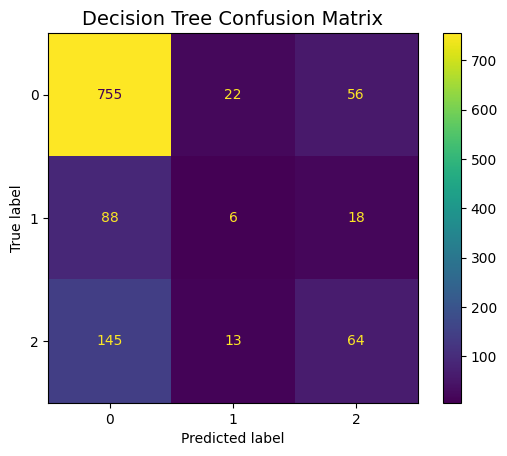

In [72]:
# matriz de confusion

cm = confusion_matrix(y_test, y_pred_dt) # decison tree
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Decision Tree Confusion Matrix", fontsize=14)
plt.show()

### prueba 2 validacion cruzada / estratificada

In [73]:
# validacion cruzada

cross_v = cross_validate(dt, x_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

train_accuracy = cross_v['train_score']
test_accuracy = cross_v['test_score']

mean_train_accuracy = np.mean(train_accuracy)
mean_test_accuracy = np.mean(test_accuracy)

print("media cross validation Train Accuracy:", mean_train_accuracy)
print("media cross validation Test Accuracy:", mean_test_accuracy)

media cross validation Train Accuracy: 0.8245128296495448
media cross validation Test Accuracy: 0.7206934700485699


In [74]:
# validacion cruzada / estratificada

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(dt, x_train, y_train, cv=stratified_kfold, scoring='accuracy',
                        return_train_score=True)

print('Cross-Validation in train set :', np.mean(scores['train_score']))
print('Cross-Validation in Validation set:', np.mean(scores['test_score']))

Cross-Validation in train set : 0.8247879738712204
Cross-Validation in Validation set: 0.7243598219104156


### prueba 3 busqueda de los mejores hiperparametros

In [75]:
# grid search

parametros_dt = {
    'max_depth': [None, 9, 10],
    'max_features': ['auto', 'sqrt', None, 9]
}
gs_dt = GridSearchCV(dt, parametros_dt, cv=stratified_kfold, return_train_score= True, scoring='accuracy')
gs_dt.fit(x_train, y_train)

print("Best Accuracy:", gs_dt.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Accuracy: 0.7324521046950891


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [76]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=9, max_features='auto', random_state=44)

In [77]:
# mejores hiperparametros

results = pd.DataFrame(gs_dt.cv_results_)

results[['params', 'mean_test_score', 'mean_train_score']].head(20)

,params,mean_test_score,mean_train_score
0,"{'max_depth': None, 'max_features': 'auto'}",0.651597,0.997427
1,"{'max_depth': None, 'max_features': 'sqrt'}",0.651597,0.997427
2,"{'max_depth': None, 'max_features': None}",0.646817,0.997427
3,"{'max_depth': None, 'max_features': 9}",0.641307,0.997427
4,"{'max_depth': 9, 'max_features': 'auto'}",0.732452,0.797501
5,"{'max_depth': 9, 'max_features': 'sqrt'}",0.732452,0.797501
6,"{'max_depth': 9, 'max_features': None}",0.726938,0.811190
7,"{'max_depth': 9, 'max_features': 9}",0.722524,0.812660
8,"{'max_depth': 10, 'max_features': 'auto'}",0.723623,0.812017
9,"{'max_depth': 10, 'max_features': 'sqrt'}",0.723623,0.812017


CUANDO INTENTE MEJORAR LOS MODELOS USANDO LOS PARAMETROS QUE ME DIO GRID SEARCH, EL MODELO MEJORA PERO TOMANDO COMO REFERENCIA EL ACCURACY, LO QUE CREA UN SESGO Y HACEN QUE EL MODELO SEA MALO CUANDO TENGA QUE PREDECIR LOS 2 VALORES QUE TIENEN MENOS REGISTROS.

### prueba 4 random forest (entrenar arboles en paralelo con muestras aleatorias)

In [78]:
# bagging classifier / random forest

bagging = BaggingClassifier(estimator=dt, n_estimators=60, random_state=42)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

print(f"Bagging accuracy: {accuracy_score(y_test, y_pred_bagging)}")


scores = cross_validate(bagging, x_train, y_train, cv=stratified_kfold, scoring='accuracy',
                        return_train_score=True)

print('bagging croos validate in train set:', np.mean(scores['train_score']))
print('bagging croos validate in Validation set:', np.mean(scores['test_score']))

# Classification report for test set
print('Classification Report for Test Set:')
print(classification_report(y_test, y_pred_bagging))

Bagging accuracy: 0.7197943444730077
bagging croos validate in train set: 0.8576810286011511
bagging croos validate in Validation set: 0.7361238532110091
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       833
           1       0.50      0.05      0.10       112
           2       0.45      0.23      0.30       222

    accuracy                           0.72      1167
   macro avg       0.57      0.41      0.41      1167
weighted avg       0.67      0.72      0.66      1167



### prueba 5 adaboost (agrega peso a las muestras)

In [79]:
# boosting / adaboost

from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(estimator=dt, n_estimators=100, random_state=42)
boosting.fit(x_train, y_train)
y_pred_boosting = boosting.predict(x_test)

print(f"AdaBoost accuracy: {accuracy_score(y_test, y_pred_boosting)}")

scores = cross_validate(boosting, x_train, y_train, cv=stratified_kfold, scoring='accuracy',
                        return_train_score=True)

print('Cross-Validation in train set:', np.mean(scores['train_score']))
print('Cross-Validation in Validation set:', np.mean(scores['test_score']))

AdaBoost accuracy: 0.7103684661525278
Cross-Validation in train set: 0.9973354454321923
Cross-Validation in Validation set: 0.711500944414463


### prueba 6 smote (datos sinteticos)

In [80]:
smote_tomek = SMOTETomek(sampling_strategy='auto', smote=SMOTE(k_neighbors= 35),
                         tomek=TomekLinks(sampling_strategy='auto'))

x_train_res, y_train_res = smote_tomek.fit_resample(x_train_scaled, y_train)
x_test_res, y_test_res = x_test_scaled, y_test
dt.fit(x_train_res, y_train_res)
y_pred = dt.predict(x_test_res)

print(classification_report(y_test_res, y_pred))

y_train_pred = dt.predict(x_train_res)
train_accuracy = accuracy_score(y_train_res, y_train_pred)
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy:.2f}")

# Calcular y mostrar el accuracy en el conjunto de prueba
test_accuracy = accuracy_score(y_test_res, y_pred)
print(f"Accuracy en el conjunto de prueba: {test_accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.77      0.81      0.79       833
           1       0.20      0.15      0.17       112
           2       0.34      0.32      0.33       222

    accuracy                           0.65      1167
   macro avg       0.44      0.43      0.43      1167
weighted avg       0.64      0.65      0.64      1167

Accuracy en el conjunto de entrenamiento: 0.72
Accuracy en el conjunto de prueba: 0.65


# CONCLUCION:

despues de las pruebas usando dos modelos e intentando mejorarlo con diferentes metodos, el modelo elegido es Random Forest, esta desiscion esta bazada en que si bien el modelo presenta un caso de overfitting es el mejor a la hora de hacer predicciones, hay que tener en cuenta que el modelo es casi inutil a la hora de predecir si vamos a ganar la mano, pero la esencia de la investigacion es predecir cuando las condiciones NO son favorlables para el combate (o entrar en una mano) y en esto el algoritmo si es bueno.

# SOLUCION:

Hay dos formas de mejorar el algoritmo que van de la mano, la primera es generando mas registros, y la segunda agregar una variable que considero fundamental que son las cartas del jugador, pero como hay 1326 combinaciones posibles y la cantidad de registros que tengo es de apenas el doble, esto quiere decir que con suerte tengo 2 ejemplos de combinaciones y el algoritmo no va a aprender de esta variable hasta que tenga la cantidad suficiente de registros.

# (!) OTROS RECURSOS

In [81]:
# serie de tiempo duarante el torneo 3566233760

# Convertir 'fecha_hora' al formato adecuado y filtrar por id de torneo
poker_df['fecha_hora'] = pd.to_datetime(poker_df['fecha_hora'], format='%d-%m-%Y %H:%M:%S ET')
poker_df_torneo_3566233760 = poker_df.loc[poker_df['id_torneo'] == 3566233760]

# Crear el gráfico utilizando Plotly Express
fig = px.line(poker_df_torneo_3566233760, x='fecha_hora', y='fichas_jugador', title='Comportamiento en el tiempo de las fichas del jugador duarante el torneo 3566233760')
fig.show()
